In [2]:
import csv
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

In [91]:
rows = []
with open('../../data/italian/rt_new.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i != 0:
            rows.append(row)
            
types = ['opaque', 'orthog', 'transp']

data = [[r for r in rows if r[3] == t] for t in types]
features = ['RT', 'F2 Prime', 'F1 Prime', 'f3', 'f4']
#features = ['RT', 'LD', 'SD', 'LD + SD', 'LD * SD']

means = []
stds = []

for i in range(4, 5):
    x = [np.mean([float(r[i]) for r in d]) for d in data]
    y = [np.std([float(r[i]) for r in d]) for d in data]
    factor = np.max(x)
    x /= factor
    y /= factor
        
    means.append(x)
    stds.append(y)
    
for i in range(-3, -3):
    x = [np.mean([float(r[i]) for r in d]) for d in data]
    y = [np.std([float(r[i]) for r in d]) for d in data]
    
    means.append(x)
    stds.append(y)
    
for i in range(-1, 0):
    x = [np.mean([float(r[i]) for r in d]) for d in data]
    y = [np.std([float(r[i]) for r in d]) for d in data]
    
    means.append(x)
    stds.append(y)

(array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2]),
 <a list of 8 Text yticklabel objects>)

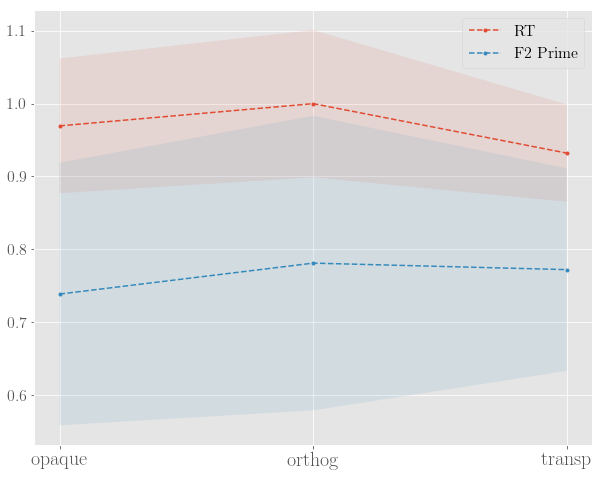

In [92]:
handles = []
x = range(0,3)

plt.figure(figsize=(10,8))
for i, mean in enumerate(means):
    handle, = plt.plot(x, mean, '.--', label=features[i])
    plt.fill_between(x, np.array(mean)-stds[i], np.array(mean)+stds[i], alpha=0.1)
    handles.append(handle)
    
plt.legend(handles=handles, fontsize='16')
plt.xticks(range(0,3), types, fontsize='20')
plt.yticks(fontsize='16')

In [71]:
means 

[array([ 0.96945647,  1.        ,  0.9320892 ]),
 [0.61530616782331737, 0.62579222460472417, 0.68317949566150815]]

In [72]:
stds

[array([ 0.09247243,  0.1011329 ,  0.06680013]),
 [0.10634912054570249, 0.12125701996674727, 0.13573852921525714]]

In [75]:
means

[array([ 0.96945647,  1.        ,  0.9320892 ]),
 [0.66900953942285168, 0.6713056073890229, 0.70008108513188039]]

In [76]:
stds

[array([ 0.09247243,  0.1011329 ,  0.06680013]),
 [0.094199822261821303, 0.084074723465947465, 0.088035962515876837]]